# QUESTION 1 - Occupations

In [49]:
#Step 1. Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Step 2. Import the dataset from this address

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

In [12]:
#Step 3. Assign it to a variable called users

users = pd.read_csv(url, sep='|')

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


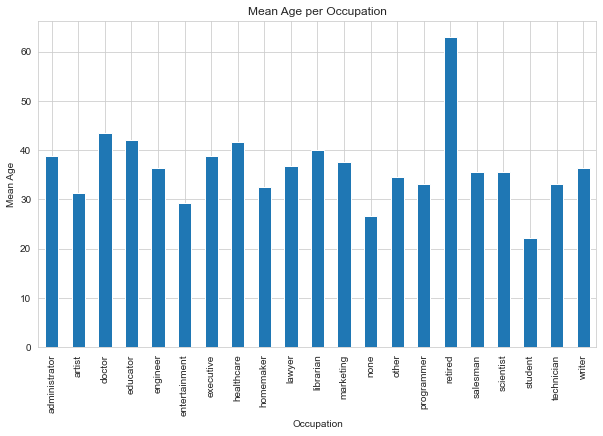

In [48]:
#Step 4. Discover what is the mean age per occupation

mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)

mean_age_by_occupation.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Occupation')
plt.ylabel('Mean Age')
plt.title('Mean Age per Occupation')
plt.show()

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_n, dtype: float64


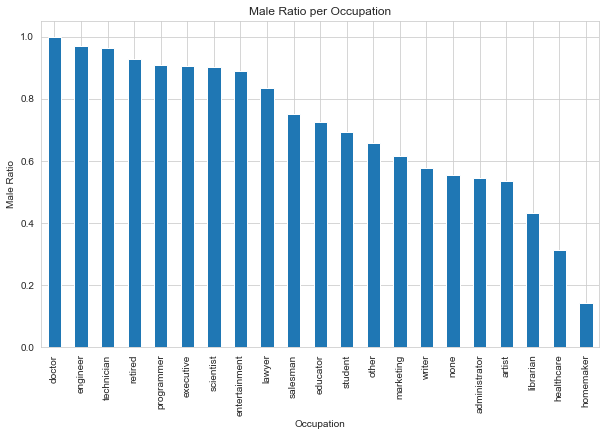

In [42]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least

def gender_to_numeric(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
    
users['gender_n'] = users['gender'].apply(gender_to_numeric)

male_ratio_by_occupation = users.groupby('occupation')['gender_n'].mean().sort_values(ascending=False)
print(male_ratio_by_occupation)

male_ratio_by_occupation.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Occupation')
plt.ylabel('Male Ratio')
plt.title('Male Ratio per Occupation')
plt.show()

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


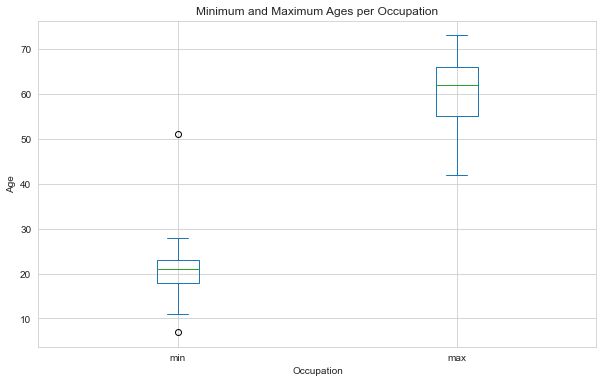

In [41]:
#Step 6. For each occupation, calculate the minimum and maximum ages

min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_age_by_occupation)

min_max_age_by_occupation.plot(kind='box', figsize=(10, 6))
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Minimum and Maximum Ages per Occupation')
plt.show()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

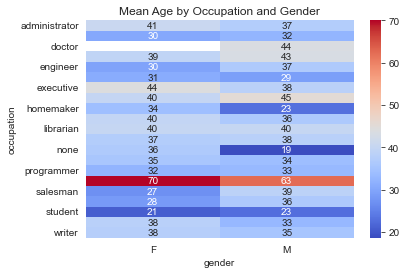

In [43]:
#Step 7. For each combination of occupation and sex, calculate the mean age

mean_age_by_occupation_and_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occupation_and_gender)

mean_age_by_occupation_and_gender = mean_age_by_occupation_and_gender.reset_index()
mean_age_by_occupation_and_gender_pivot = mean_age_by_occupation_and_gender.pivot(index='occupation', columns='gender', values='age')

sns.heatmap(mean_age_by_occupation_and_gender_pivot, annot=True, cmap='coolwarm')
plt.title('Mean Age by Occupation and Gender')
plt.show()

                     Male     Female
occupation                          
administrator   54.430380  45.569620
artist          53.571429  46.428571
doctor         100.000000        NaN
educator        72.631579  27.368421
engineer        97.014925   2.985075
entertainment   88.888889  11.111111
executive       90.625000   9.375000
healthcare      31.250000  68.750000
homemaker       14.285714  85.714286
lawyer          83.333333  16.666667
librarian       43.137255  56.862745
marketing       61.538462  38.461538
none            55.555556  44.444444
other           65.714286  34.285714
programmer      90.909091   9.090909
retired         92.857143   7.142857
salesman        75.000000  25.000000
scientist       90.322581   9.677419
student         69.387755  30.612245
technician      96.296296   3.703704
writer          57.777778  42.222222


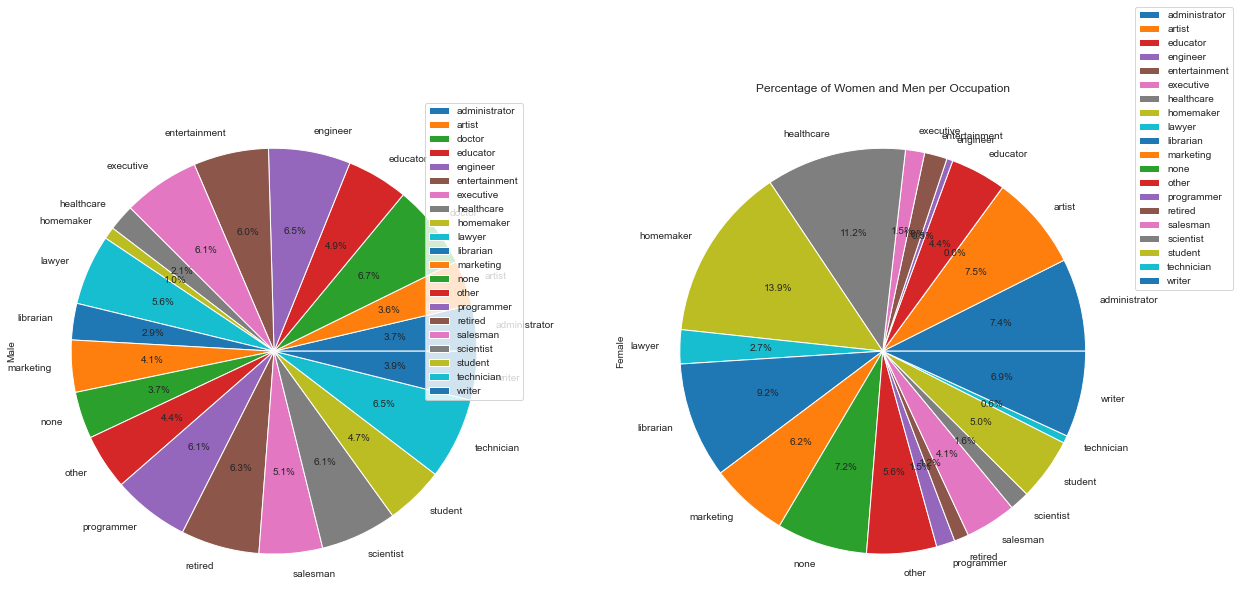

In [47]:
#Step 8. For each occupation present the percentage of women and men

total_count_by_occupation = users.groupby('occupation')['gender'].count()

male_count_by_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()

female_count_by_occupation = users[users['gender'] == 'F'].groupby('occupation')['gender'].count()

male_percentage_by_occupation = (male_count_by_occupation / total_count_by_occupation) * 100
female_percentage_by_occupation = (female_count_by_occupation / total_count_by_occupation) * 100

gender_percentage_by_occupation = pd.concat([male_percentage_by_occupation, female_percentage_by_occupation], axis=1)
gender_percentage_by_occupation.columns = ['Male', 'Female']

print(gender_percentage_by_occupation)


gender_percentage_by_occupation.plot(kind='pie', subplots=True, figsize=(20, 29), autopct='%1.1f%%')
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.9))
plt.title('Percentage of Women and Men per Occupation')
plt.show()

# Question 2 - Euro Teams 

In [68]:
# Step 1. Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Step 2. Import the dataset from this address

# Step 3. Assign it to a variable called euro12

url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

euro12 = pd.read_csv(url, sep=',')

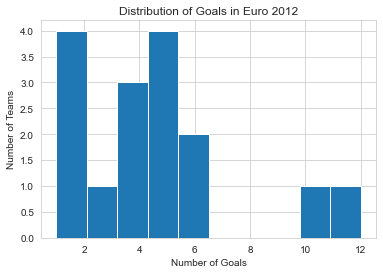

In [70]:
# Step 4. Select only the Goal column

goals = euro12['Goals']

plt.hist(euro12['Goals'])
plt.xlabel('Number of Goals')
plt.ylabel('Number of Teams')
plt.title('Distribution of Goals in Euro 2012')
plt.show()

In [58]:
# Step 5. How many team participated in the Euro2012?

teams_count = euro12['Team'].count()
print(f"Number of teams in Euro 2012: {teams_count}")

Number of teams in Euro 2012: 16


In [59]:
# Step 6. What is the number of columns in the dataset?

print(f"Number of columns in Euro 2012 dataset: {len(euro12.columns)}")

Number of columns in Euro 2012 dataset: 35


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


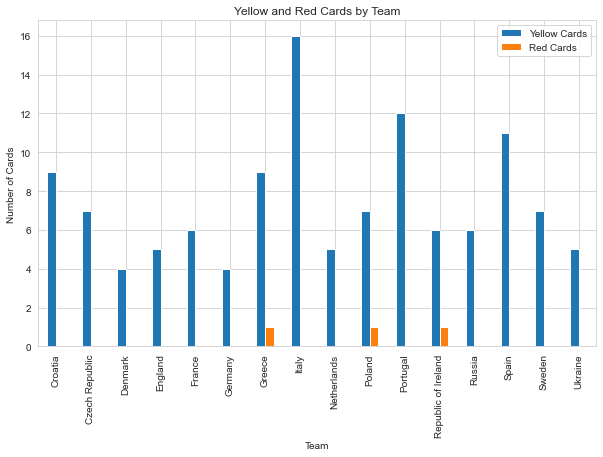

In [71]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline.plot(x='Team', y=['Yellow Cards', 'Red Cards'], kind='bar', figsize=(10,6))
plt.xlabel('Team')
plt.ylabel('Number of Cards')
plt.title('Yellow and Red Cards by Team')
plt.legend(['Yellow Cards', 'Red Cards'])
plt.show()

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


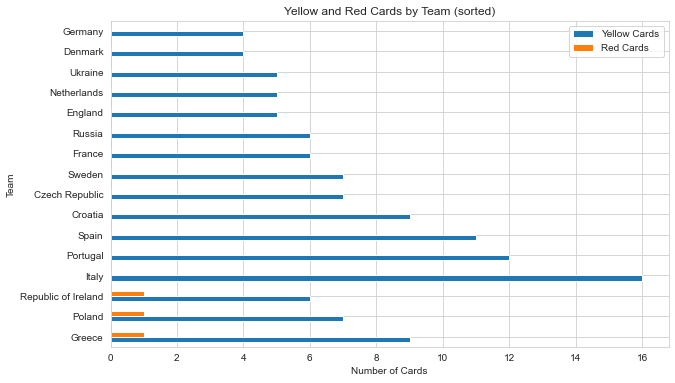

In [72]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards

discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline_sorted)

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

discipline_sorted.plot(x='Team', y=['Yellow Cards', 'Red Cards'], kind='barh', figsize=(10,6))
plt.ylabel('Team')
plt.xlabel('Number of Cards')
plt.title('Yellow and Red Cards by Team (sorted)')
plt.legend(['Yellow Cards', 'Red Cards'])
plt.show()

Mean Yellow Cards per team: 7.44


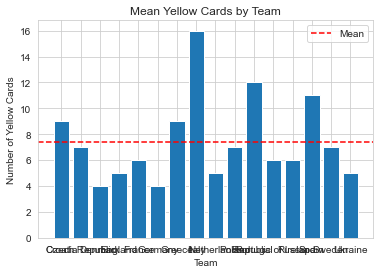

In [75]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_yellow_cards = discipline['Yellow Cards'].mean()
print(f"Mean Yellow Cards per team: {mean_yellow_cards:.2f}")

mean_yellow_cards = discipline['Yellow Cards'].mean()

plt.bar(discipline['Team'], discipline['Yellow Cards'])
plt.axhline(mean_yellow_cards, color='red', linestyle='--', label='Mean')
plt.xlabel('Team')
plt.ylabel('Number of Yellow Cards')
plt.title('Mean Yellow Cards by Team')
plt.legend()
plt.show()

       Team  Goals
5   Germany     10
13    Spain     12


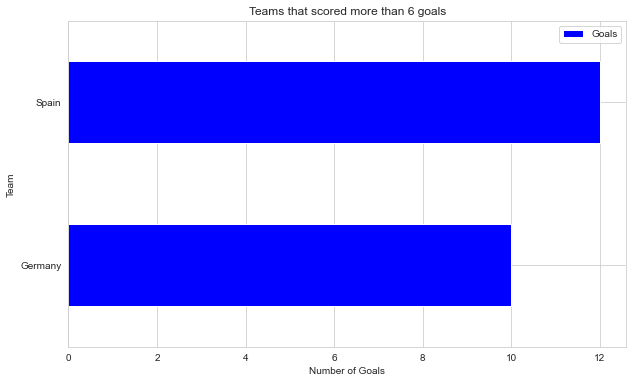

In [80]:
# Step 10. Filter teams that scored more than 6 goals

high_scorers = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print(high_scorers)

goals_filter = euro12[euro12['Goals'] > 6]

goals_filter.plot(x='Team', y='Goals', kind='barh', figsize=(10,6) , color='Blue')
plt.ylabel('Team')
plt.xlabel('Number of Goals')
plt.title('Teams that scored more than 6 goals')
plt.show()

      Team
5  Germany
6   Greece


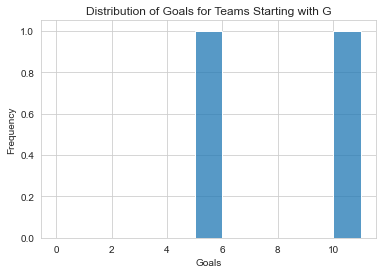

In [85]:
# Step 11. Select the teams that start with G

g_teams = euro12[euro12['Team'].str.startswith('G')][['Team']]
print(g_teams)

g_teams = euro12[euro12['Team'].str.startswith('G')]
sns.histplot(data=g_teams, x='Goals', bins=range(0,12))
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals for Teams Starting with G')
plt.show()

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

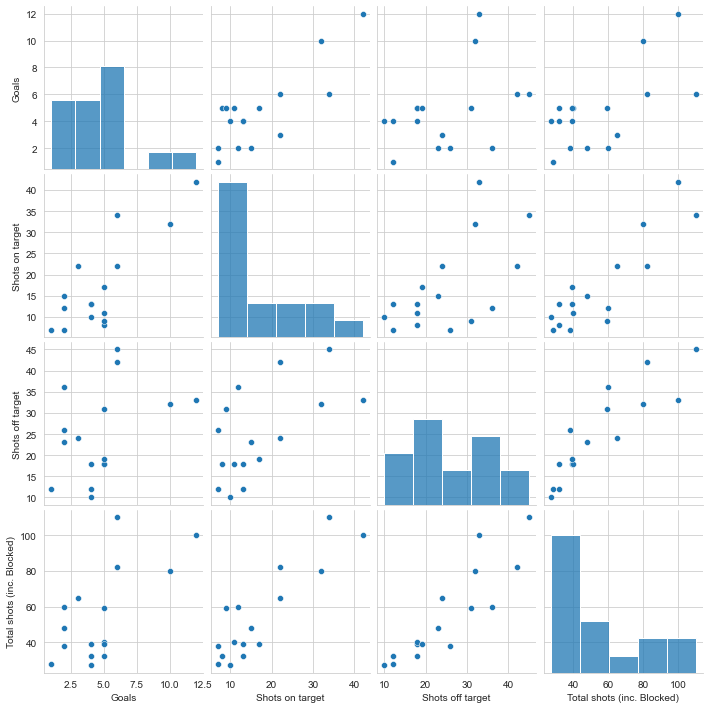

In [84]:
# Step 12. Select the first 7 columns

first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)

first_7 = euro12.iloc[:, 0:7]
sns.pairplot(data=first_7)
plt.show()

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

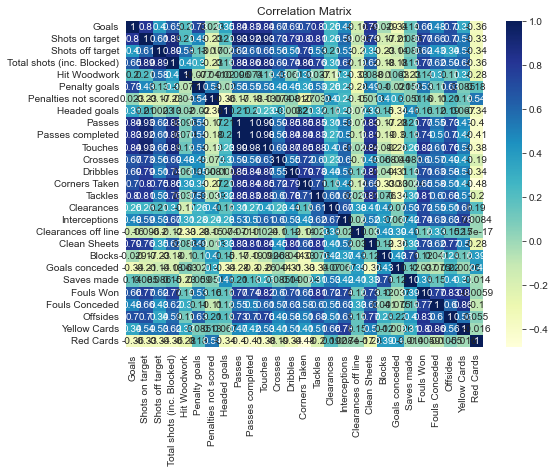

In [87]:
# Step 13. Select all columns except the last 3

all_but_last_3_columns = euro12.iloc[:, :-3]
print(all_but_last_3_columns)

all_except_last_3 = euro12.iloc[:, :-3]
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
sns.heatmap(all_except_last_3.corr(), annot=True, cmap='YlGnBu')
plt.show()

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


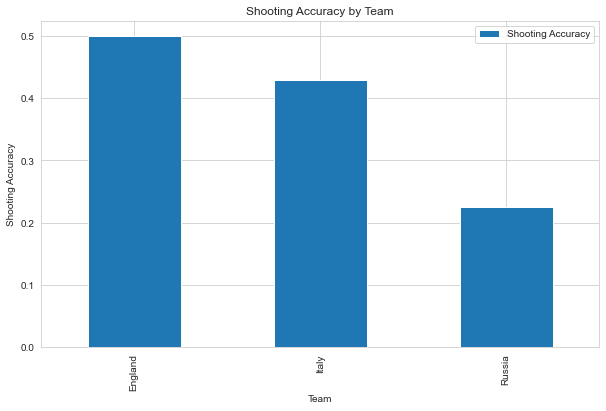

In [83]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

columns_to_select = ['Team', 'Shooting Accuracy']
teams_of_interest = ['England', 'Italy', 'Russia']
shooting_accuracy = euro12[euro12['Team'].isin(teams_of_interest)][columns_to_select]
print(shooting_accuracy)

shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy['Shooting Accuracy'] = shooting_accuracy['Shooting Accuracy'].str.replace('%', '').astype(float) / 100

shooting_accuracy.plot(x='Team', y='Shooting Accuracy', kind='bar', figsize=(10,6))
plt.xlabel('Team')
plt.ylabel('Shooting Accuracy')
plt.title('Shooting Accuracy by Team')
plt.show()

# Question 3 - Housing - No Data

# Question 4

In [2]:
# Step 1. Import the necessary libraries

import pandas as pd
import numpy as np

In [4]:
# Step 2. Import the dataset from the attached file wind.txt

data = pd.read_csv("wind.txt", sep='\s+', na_values="NaN", header=None)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
3,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
4,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88


In [17]:
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index. 

data['Yr'] = data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)
date = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
data.index = date
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

In [21]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

def fix_year(x):
    if x.year > 2000:
        year = x.year - 100
    else:
        year = x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)

In [22]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns]

data = data.astype(float).fillna(value=np.nan)
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

In [23]:
# Step 6. Compute how many values are missing for each location over the entire record.

missing_values = data.isna().sum()

In [24]:
# Step 7. Compute how many non-missing values there are in total.

non_missing_values = data.notna().sum().sum()

In [25]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.

mean_windspeed = data.mean().mean()

In [26]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. A different set of numbers for each location.

loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

In [27]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.

january_data = data[data.index.month == 1]
january_mean = january_data.mean()

In [28]:
# Step 12. Downsample the record to a yearly frequency for each location.

yearly_data = data.resample('Y').mean()

In [29]:
# Step 13. Downsample the record to a monthly frequency for each location.

monthly_data = data.resample('M').mean()

In [30]:
# Step 14. Downsample the record to a weekly frequency for each location.

weekly_data = data.resample('W').mean()

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB
None


In [35]:
#Step 15. Downsample to weekly frequency starting from January 2, 1961
weekly_data = data.loc['1961-01-02':'1961-12-31'].resample('W').mean()

# Calculate the min, max, mean, and standard deviation of windspeeds for each week
weekly_stats = weekly_data.describe()

# Print the summary statistics for the first 52 weeks
print(weekly_stats.iloc[:52])

             RPT        VAL        ROS        KIL        SHA        BIR  \
count  52.000000  52.000000  52.000000  52.000000  52.000000  52.000000   
mean   12.289130  10.332060  11.347326   6.946740  10.876502   7.723846   
std     3.402637   2.831028   2.847221   2.067368   2.677186   2.431632   
min     4.202857   4.255714   6.738571   3.300000   6.112857   2.715714   
25%    10.206786   8.431071   9.025000   5.432857   8.966071   5.934286   
50%    11.643571   9.662143  10.860714   6.549286  10.357143   7.455000   
75%    15.152857  12.216429  13.198929   8.277857  13.277857   9.183929   
max    19.880000  16.417143  18.225714  12.720000  17.432857  14.828571   

             DUB        CLA        MUL        CLO        BEL        MAL  
count  52.000000  52.000000  52.000000  52.000000  52.000000  52.000000  
mean    9.730810   8.843375   8.653617   9.820893  13.489066  13.681625  
std     2.812689   2.456673   2.409221   2.585514   3.615946   3.580699  
min     3.964286   4.257143 

# Question 5

In [37]:
# Step 1. Import the necessary libraries:

import pandas as pd
import numpy as np

In [38]:
# Step 2. Import the dataset from this address:

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

In [39]:
# Step 3. Assign it to a variable called chipo:

chipo = pd.read_csv(url, sep="\t")

In [40]:
# Step 4. See the first 10 entries:

print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [41]:
# Step 5. What is the number of observations in the dataset?

print(chipo.shape[0]) 

4622


In [42]:
# Step 6. What is the number of columns in the dataset?

print(chipo.shape[1])

5


In [43]:
# Step 7. Print the name of all the columns:

print(chipo.columns.tolist())

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [44]:
# Step 8. How is the dataset indexed?

print(chipo.index) 

RangeIndex(start=0, stop=4622, step=1)


In [45]:
# Step 9. Which was the most-ordered item?

most_ordered_item = chipo.groupby('item_name')['quantity'].sum().nlargest(1)
print(most_ordered_item)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64


In [46]:
# Step 10. For the most-ordered item, how many items were ordered?

most_ordered_item_qty = most_ordered_item.values[0]
print(most_ordered_item_qty)  

761


In [47]:
# Step 11. What was the most ordered item in the choice_description column?

most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().nlargest(1)
print(most_ordered_choice)

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64


In [48]:
# Step 12. How many items were ordered in total?

total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [49]:
# Step 13. Turn the item price into a float

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [50]:
# Check the item price type:

print(chipo['item_price'].dtype)

float64


In [51]:
# Step 14. How much was the revenue for the period in the dataset?

revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue) 

39237.02


In [52]:
# Step 15. How many orders were made in the period?

num_orders = chipo['order_id'].nunique()
print(num_orders)

1834


In [53]:
#Step 16. What is the average revenue amount per order?

avg_rev_per_order = revenue / num_orders
print(avg_rev_per_order)

21.39423118865867


In [54]:
# Step 17. How many different items are sold?

num_items_sold = chipo['item_name'].nunique()
print(num_items_sold)

50


# Question 6

In [56]:
#Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load the data into a pandas DataFrame

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [58]:
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [59]:
# Create a new DataFrame with only the necessary columns
df_per_capita = df[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]

In [60]:
# Set the Year column as the index
df_per_capita = df_per_capita.set_index('Year')

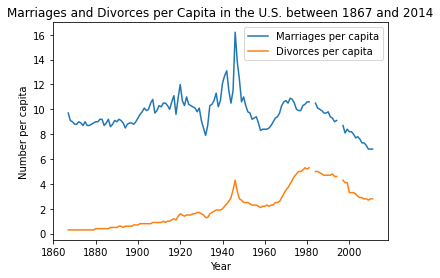

In [61]:
# Create the line plot
plt.plot(df_per_capita['Marriages_per_1000'], label='Marriages per capita')
plt.plot(df_per_capita['Divorces_per_1000'], label='Divorces per capita')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per Capita in the U.S. between 1867 and 2014')
plt.legend()

# Show the plot
plt.show()

# Question 7

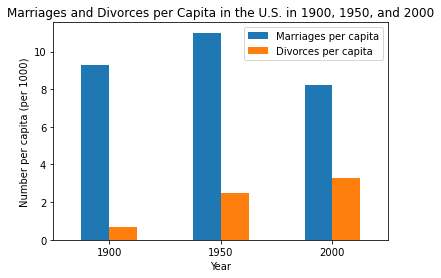

In [65]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Create a new DataFrame with only the necessary columns and rows for the years 1900, 1950, and 2000
df_select = df[df['Year'].isin([1900, 1950, 2000])]
df_select = df_select[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]

# Set the Year column as the index
df_select = df_select.set_index('Year')

# Create the vertical bar chart
df_select.plot(kind='bar', rot=0)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number per capita (per 1000)')
plt.title('Marriages and Divorces per Capita in the U.S. in 1900, 1950, and 2000')
plt.legend(['Marriages per capita', 'Divorces per capita'])

# Show the plot
plt.show()

# Question 8

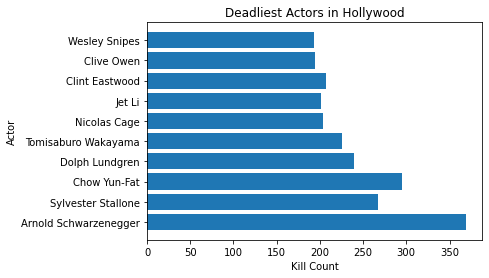

In [67]:
# Import Library
import matplotlib.pyplot as plt

# Data
actors = ['Arnold Schwarzenegger', 'Sylvester Stallone', 'Chow Yun-Fat', 'Dolph Lundgren', 'Tomisaburo Wakayama',
          'Nicolas Cage', 'Jet Li', 'Clint Eastwood', 'Clive Owen', 'Wesley Snipes']
counts = [369, 267, 295, 239, 226, 204, 201, 207, 194, 193]

# Create horizontal bar chart
plt.barh(actors, counts)

# Add axis labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display the chart
plt.show()

# Question 9

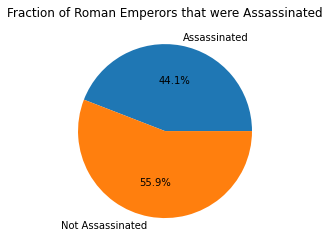

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv('roman-emperor-reigns.csv')

# calculate the number of emperors that were assassinated
num_assassinated = len(df[df['Cause_of_Death'].str.contains('assassinated', case=False)])

# calculate the number of emperors that were not assassinated
num_not_assassinated = len(df) - num_assassinated

# create the pie chart
plt.pie([num_assassinated, num_not_assassinated], labels=['Assassinated', 'Not Assassinated'], autopct='%1.1f%%')
plt.title('Fraction of Roman Emperors that were Assassinated')

# show the chart
plt.show()

# Question 10

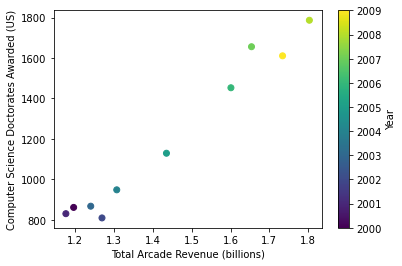

In [70]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Create the scatter plot
plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'], c=df['Year'])

# Add axis labels
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Add a color bar
cbar = plt.colorbar()
cbar.set_label('Year')

# Show the plot
plt.show()